In [2]:
from db.io import read_prices, separate_hourly_daily
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat

df = read_prices()


df_daily, df_hourly = separate_hourly_daily(df)
df_hourly.head(20)

⚠️  Warning: 60 hourly bars outside expected trading hours
   Hours: [8]
   Minutes: [30]


/Users/zia/risk-dashboard/db/io.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["return"] = df.groupby("ticker")["close"].pct_change()
/Users/zia/risk-dashboard/db/io.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["bars_per_day"] = df.groupby(["ticker", "date"])["datetime"].transform("count")


,id,datetime,ticker,open,high,low,close,volume,return
0,4,2025-10-03 11:30:00+00:00,GLD,357.310000,357.62970,357.109990,357.440000,1168656.0,-0.000559
1,8,2025-10-03 12:30:00+00:00,GLD,357.450010,357.60999,356.799990,357.477690,1306371.0,0.000105
2,12,2025-10-03 13:30:00+00:00,GLD,357.480010,357.94000,357.359990,357.679990,1839988.0,0.000566
3,14,2025-10-03 14:30:00+00:00,GLD,357.690000,357.95001,357.489990,357.630000,1517067.0,-0.000140
4,17,2025-10-06 08:30:00+00:00,GLD,362.160000,363.51001,361.370000,363.329990,4655033.0,-0.002882
5,24,2025-10-06 09:30:00+00:00,GLD,363.310000,364.34000,363.209990,363.489900,3280493.0,0.000440
6,28,2025-10-06 10:30:00+00:00,GLD,363.459990,365.29999,363.120000,363.718990,2998917.0,0.000630
7,29,2025-10-06 11:30:00+00:00,GLD,363.739990,364.33011,363.579990,363.660000,1114492.0,-0.000162
8,36,2025-10-06 12:30:00+00:00,GLD,363.670010,364.41000,363.609990,364.234990,1200359.0,0.001581
9,37,2025-10-06 13:30:00+00:00,GLD,364.239990,364.84000,364.049988,364.780000,1384341.0,0.001496


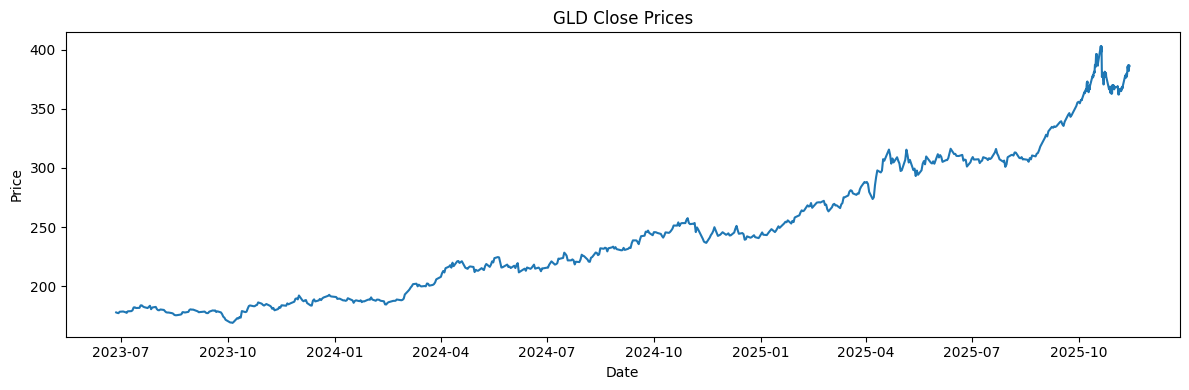

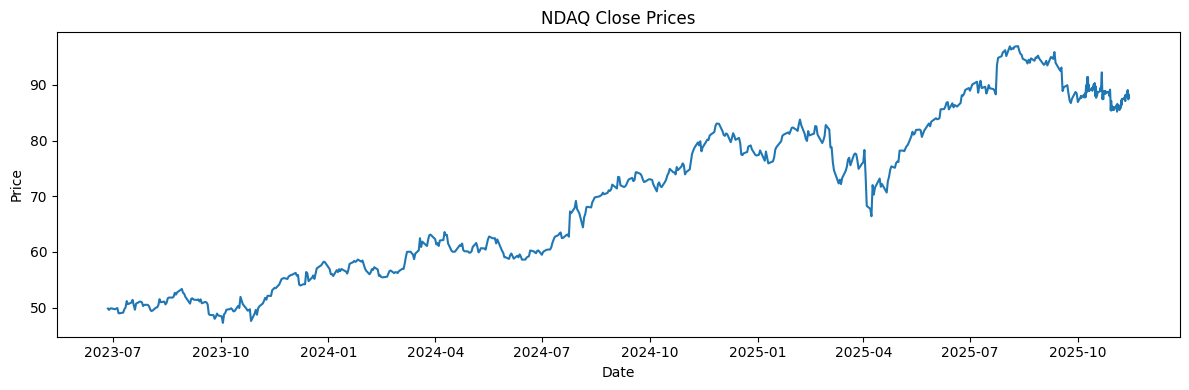

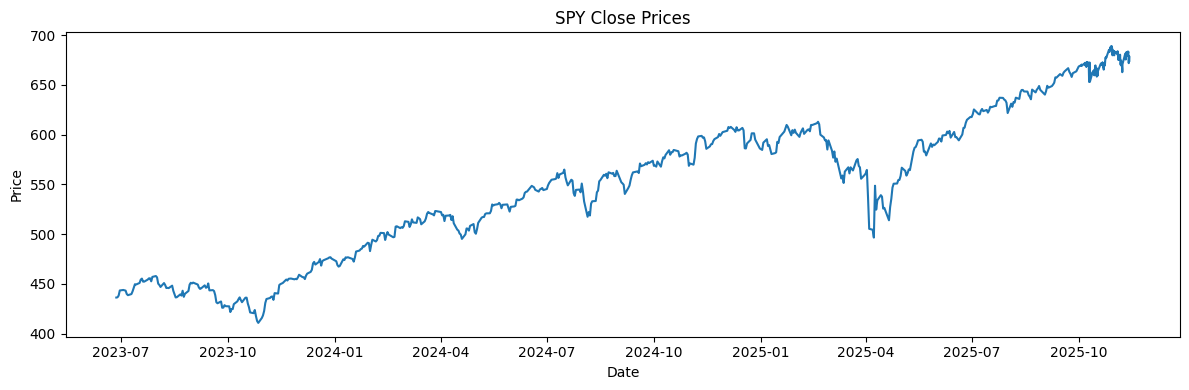

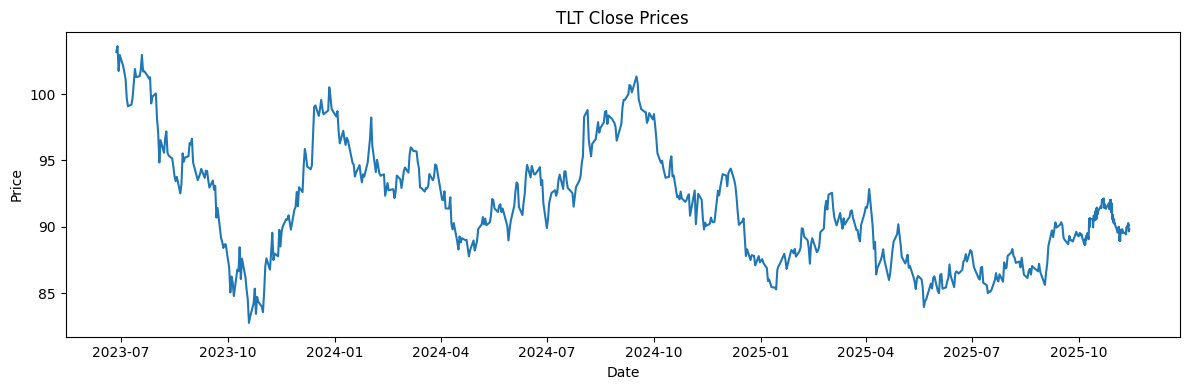

In [10]:
df = df.sort_values(["ticker", "datetime"])
import matplotlib.pyplot as plt

for t in df["ticker"].unique():
    subset = df[df["ticker"] == t]

    plt.figure(figsize=(12, 4))
    plt.plot(subset["datetime"], subset["close"])
    plt.title(f"{t} Close Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

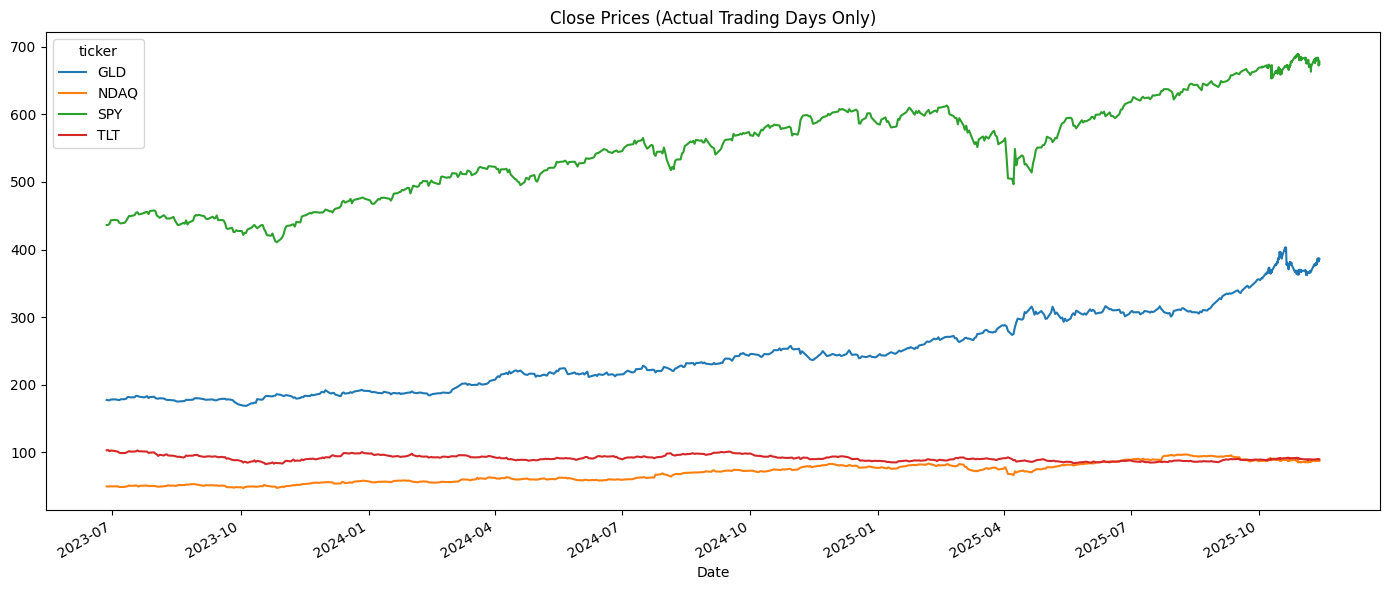

In [11]:
wide = df.pivot(index="datetime", columns="ticker", values="close")
wide.plot(figsize=(14, 6))
plt.title("Close Prices (Actual Trading Days Only)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [12]:
a = (df["close"] == 0).sum() #Check for close price at 0
b = df['datetime'].isna().sum()
c = df.duplicated(subset=["datetime","ticker"]).sum()
print(a,b,c)

0 0 0


In [3]:
import plotly.graph_objects as go

def plot_ohlc(df, ticker):
    data = df[df["ticker"] == ticker].sort_values("datetime")

    fig = go.Figure(go.Candlestick(
        x=data["datetime"],
        open=data["open"],
        high=data["high"],
        low=data["low"],
        close=data["close"],
        increasing_line_color="green",
        increasing_fillcolor="rgba(0, 200, 0, 0.6)",
        decreasing_line_color="red",
        decreasing_fillcolor="rgba(200, 0, 0, 0.6)"
    ))

    fig.update_layout(
        title=f"{ticker} OHLC",
        xaxis_title="Date",
        yaxis_title="Price",
        width=1100,
        height=600,
        margin=dict(l=40, r=40, t=40, b=40),
        xaxis_rangeslider_visible=False
    )

    # remove weekend gaps and market-closed periods
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]),  # weekends
            dict(bounds=[17, 9], pattern="day of week")  # outside trading hours
        ]
    )

    # cleaner grid and darker wicks
    fig.update_layout(
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True, gridcolor="lightgrey")
    )
    
    # ensure wicks are black
    fig.data[0].increasing.line.color = "black"
    fig.data[0].decreasing.line.color = "black"

    fig.show()
    
for t in df_daily["ticker"].unique():
    plot_ohlc(df_daily, t)

In [ ]:
go.Figure(go.Scatter.line(
    
)
    
)